## Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

### 1.1. Скачать следующие данные: [kc-house-data](https://gbcdn.mrgcdn.ru/uploads/asset/5349842/attachment/16ab1213a48b859e6e5e7407e10933ff.csv) и [laptop_price](https://gbcdn.mrgcdn.ru/uploads/asset/5349844/attachment/3b40712030489b6656a525045f3b0ed1.csv)

In [130]:
import pandas as pd
kc_house = pd.read_csv('https://gbcdn.mrgcdn.ru/uploads/asset/5349842/attachment/16ab1213a48b859e6e5e7407e10933ff.csv')
laptop = pd.read_csv('https://gbcdn.mrgcdn.ru/uploads/asset/5349844/attachment/3b40712030489b6656a525045f3b0ed1.csv', encoding='1251')

In [131]:
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [132]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### 1.2. Изучите стоимости недвижимости

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

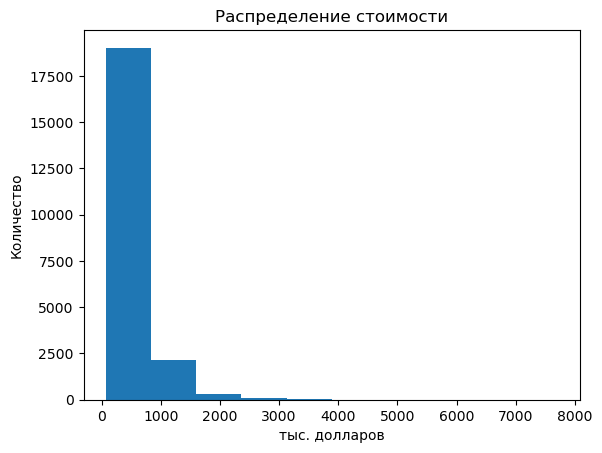

In [134]:
plt.hist(kc_house['price']/1000)
plt.title('Распределение стоимости')
plt.xlabel('тыс. долларов')
plt.ylabel('Количество');

### 1.3. Изучите распределение квадратуры жилой

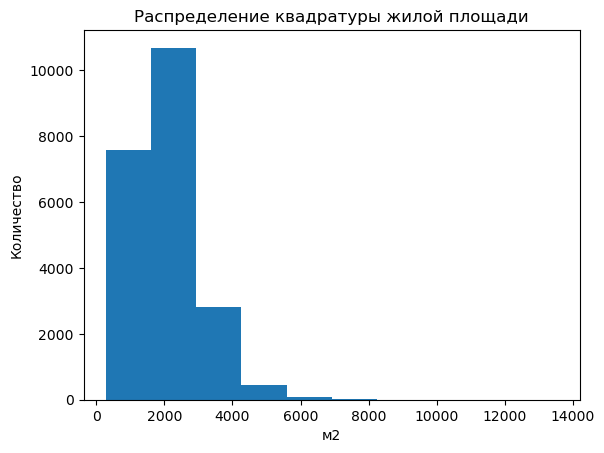

In [135]:
plt.hist(kc_house['sqft_living'])
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('м2')
plt.ylabel('Количество');

### 1.4. Изучите распределение года постройки

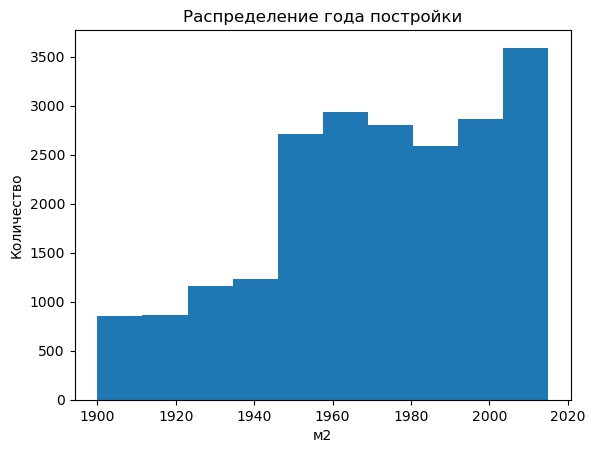

In [136]:
plt.hist(kc_house['yr_built'])
plt.title('Распределение года постройки')
plt.xlabel('м2')
plt.ylabel('Количество');

## Условие 2: 2 задача

### 2.1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

In [137]:
data = kc_house['waterfront'].value_counts()
data

waterfront
0    21450
1      163
Name: count, dtype: int64

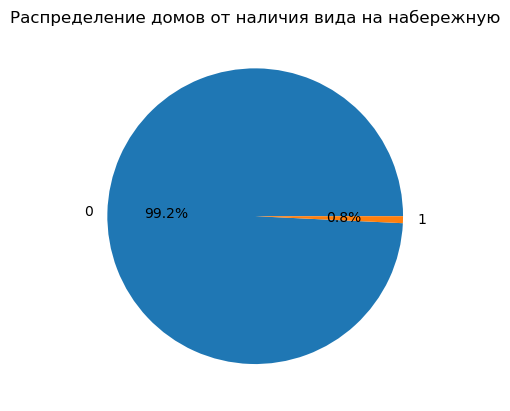

In [138]:
names = data.index
values = data.values
plt.pie(values, autopct='%.1f%%', labels=names)
plt.title('Распределение домов от наличия вида на набережную');

### 2.2. Изучите распределение этажей домов

In [139]:
data = kc_house['floors'].value_counts()
data

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

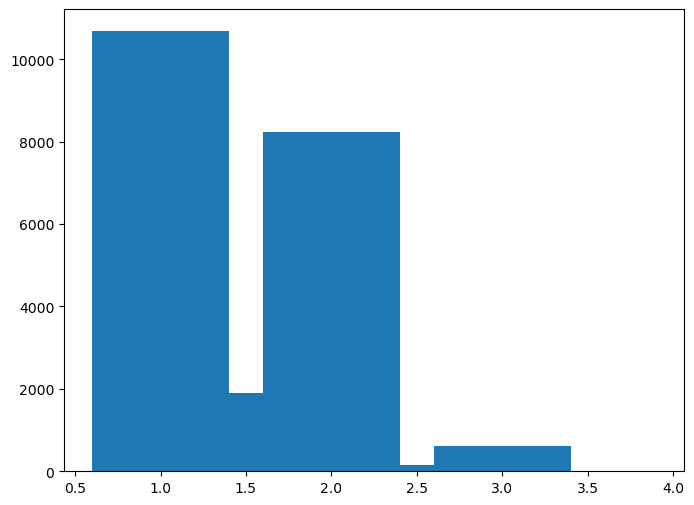

In [140]:
names = data.index
values = data.values
plt.figure(figsize=(8, 6))
plt.bar(names, values);

### 2.3. Изучите распределение состояния домов

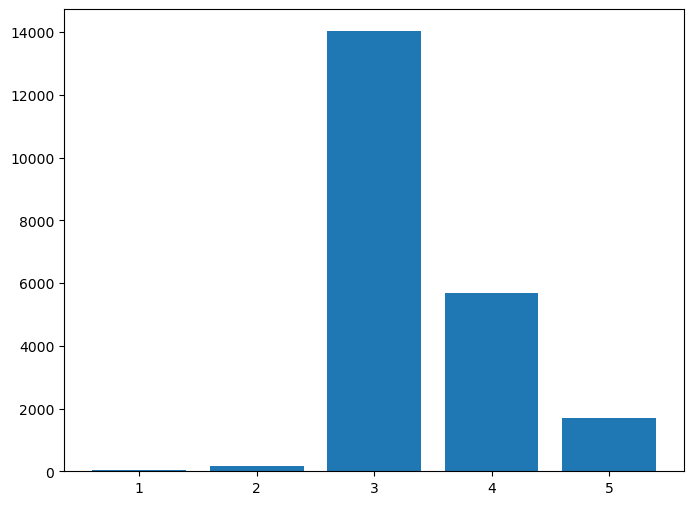

In [141]:
data = kc_house['condition'].value_counts()
names = data.index
values = data.values
plt.figure(figsize=(8, 6))
plt.bar(names, values);

### Условие 3: 3 задача

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

### Зависимость стоимости дома от его состояния 

In [142]:
data = kc_house.groupby(['condition']).agg({'price': 'mean'}).reset_index()

In [143]:
data['condition'] = data['condition'].astype(int)
data.dtypes

condition      int32
price        float64
dtype: object

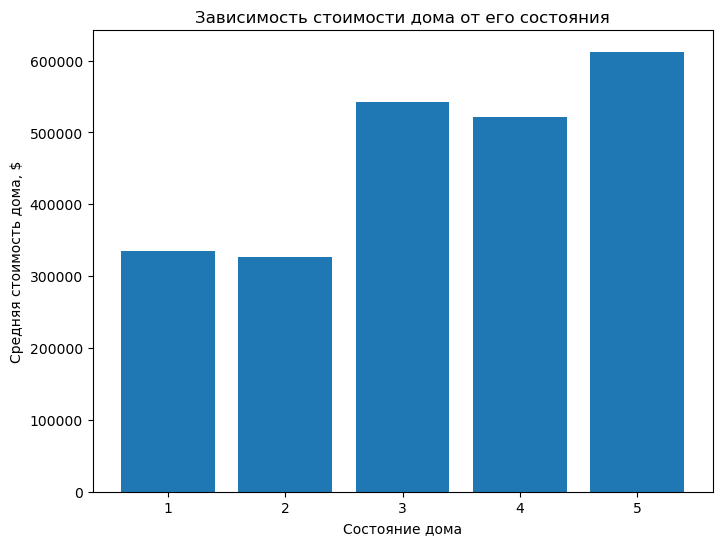

In [144]:
plt.figure(figsize=(8, 6))
plt.bar(data['condition'], data['price'])
plt.title('Зависимость стоимости дома от его состояния')
plt.xlabel('Состояние дома')
plt.ylabel('Средняя стоимость дома, $');

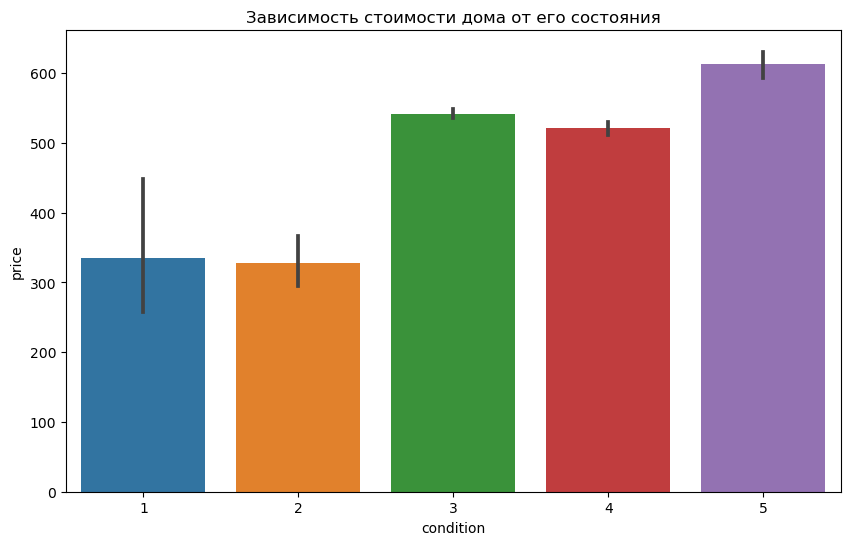

In [145]:
plt.figure(figsize=(10, 6))
sns.barplot(x=kc_house['condition'], y=kc_house['price']/1000)
plt.title('Зависимость стоимости дома от его состояния');

### Выводы:
Из графика выше видно, что в целом дома с лучшим состоянием стоят больше. Средняя стоимость домов с состоянием 1 и 2почто не отличается, а дома с оценкой 4 в среднем стот даже немного дешевле домов с оценкой 5

### Зависимость стоимости дома от наличия набережной

<AxesSubplot:xlabel='waterfront', ylabel='price'>

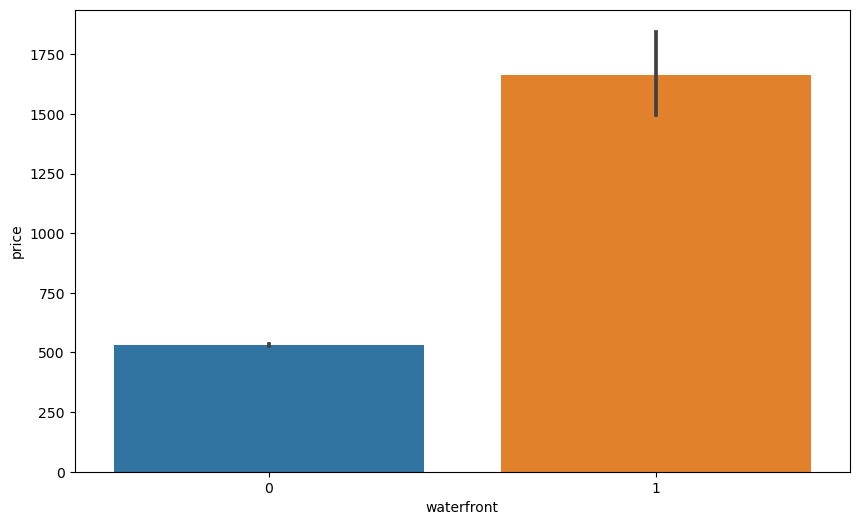

In [146]:
plt.figure(figsize=(10, 6))
sns.barplot(x=kc_house['waterfront'], y=kc_house['price']/1000)

### Выводы:
Дома возле моря стоят дороже

### Зависимость стоимости дома от размера жилой площади

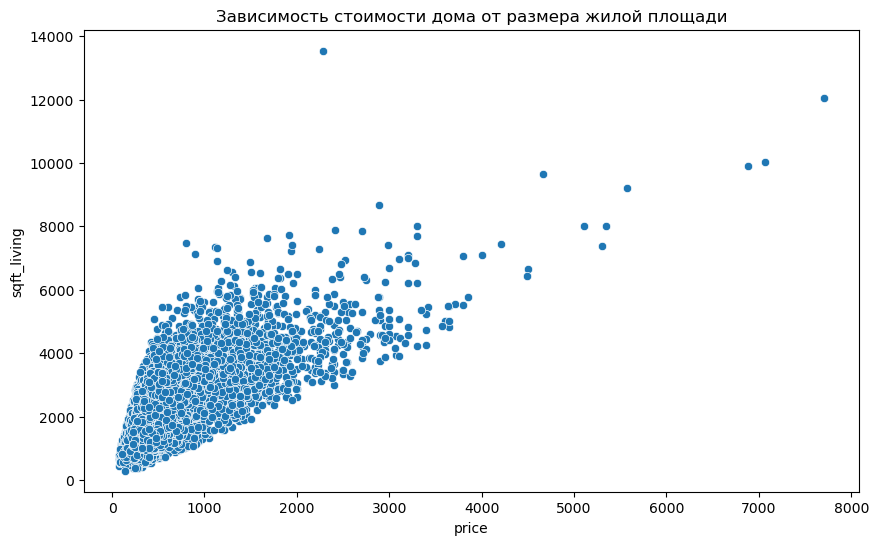

In [147]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=kc_house['price']/1000, y=kc_house['sqft_living'])
plt.title('Зависимость стоимости дома от размера жилой площади');

### Выводы:
Из графика выше видно, что с ростом жилой площади растёт и стоимость дома.